In [2]:
import torch
import torchaudio

print(torch.__version__)
print(torchaudio.__version__)

torch.random.manual_seed(0)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print(device)

2.0.0+cu117
2.0.1+cu117
cuda


In [16]:
import IPython
import matplotlib.pyplot as plt
from torchaudio.utils import download_asset

bundle = torchaudio.pipelines.WAV2VEC2_BASE


print("Sample Rate:", bundle.sample_rate)
 

model = bundle.get_model().to(device)
print(model.__class__)


Sample Rate: 16000


Downloading: "https://download.pytorch.org/torchaudio/models/wav2vec2_fairseq_base_ls960.pth" to /home/lex/.cache/torch/hub/checkpoints/wav2vec2_fairseq_base_ls960.pth
100%|██████████| 360M/360M [00:07<00:00, 48.2MB/s] 


<class 'torchaudio.models.wav2vec2.model.Wav2Vec2Model'>


In [17]:
waveform, sample_rate = torchaudio.load('./kaggle/input/birdclef-2023/train_audio/abethr1/XC128013.ogg')
waveform = waveform.to(device)

if sample_rate != bundle.sample_rate:
    waveform = torchaudio.functional.resample(waveform, sample_rate, bundle.sample_rate)

In [18]:
with torch.inference_mode():
    features, _ = model.extract_features(waveform)
 

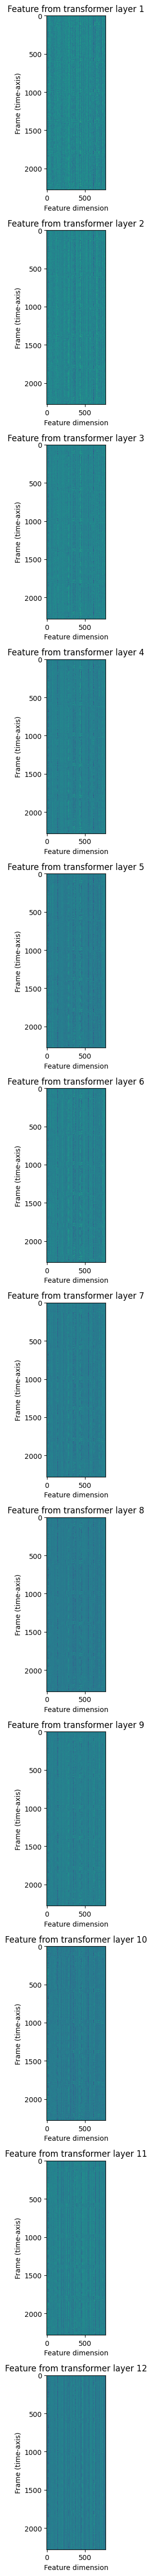

In [19]:
fig, ax = plt.subplots(len(features), 1, figsize=(16, 4.3 * len(features)))
for i, feats in enumerate(features):
    ax[i].imshow(feats[0].cpu(), interpolation="nearest")
    ax[i].set_title(f"Feature from transformer layer {i+1}")
    ax[i].set_xlabel("Feature dimension")
    ax[i].set_ylabel("Frame (time-axis)")
plt.tight_layout()
plt.show()

In [20]:
with torch.inference_mode():
    emission, _ = model(waveform)

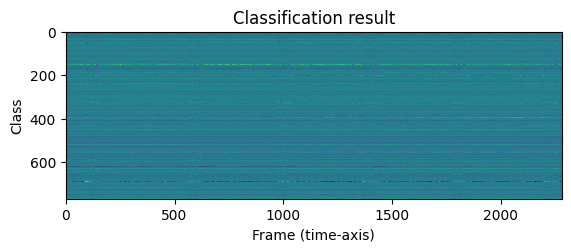

AttributeError: 'Wav2Vec2Bundle' object has no attribute 'get_labels'

In [21]:
plt.imshow(emission[0].cpu().T, interpolation="nearest")
plt.title("Classification result")
plt.xlabel("Frame (time-axis)")
plt.ylabel("Class")
plt.show() 